## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
print(X.isnull().values.any()) # no missing values
print(X.columns[X.dtypes!=float].any()) # all data is numerical

False
False


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.metrics import accuracy_score
import pandas as pd
result = {"NN":[1 ,3 ,5 , 10, 15, 25],"Train":[],"Test":[],"Clf":[]}

scaler = StandardScaler()
scaler.fit(np.array(X_train[["alcohol","magnesium"]].to_numpy()))
X_train = scaler.transform(X_train[["alcohol","magnesium"]].to_numpy())
X_test = scaler.transform(X_test[["alcohol","magnesium"]].to_numpy())

for n in result["NN"]:
  clf = KNeighborsClassifier(n_neighbors=n,)
  clf.fit(X_train, y_train)
  result["Train"].append(accuracy_score(y_train, clf.predict(X_train)))
  result["Test"].append(accuracy_score(y_test, clf.predict(X_test)))
  result["Clf"].append(clf)
pd.DataFrame(result)[["NN","Train","Test"]].set_index("NN")

,Train,Test
NN,,
1,0.991935,0.740741
3,0.782258,0.722222
5,0.766129,0.648148
10,0.725806,0.666667
15,0.725806,0.666667
25,0.717742,0.703704


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [7]:
! pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend
import itertools
plt.rcParams['figure.figsize'] = [17, 9]

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

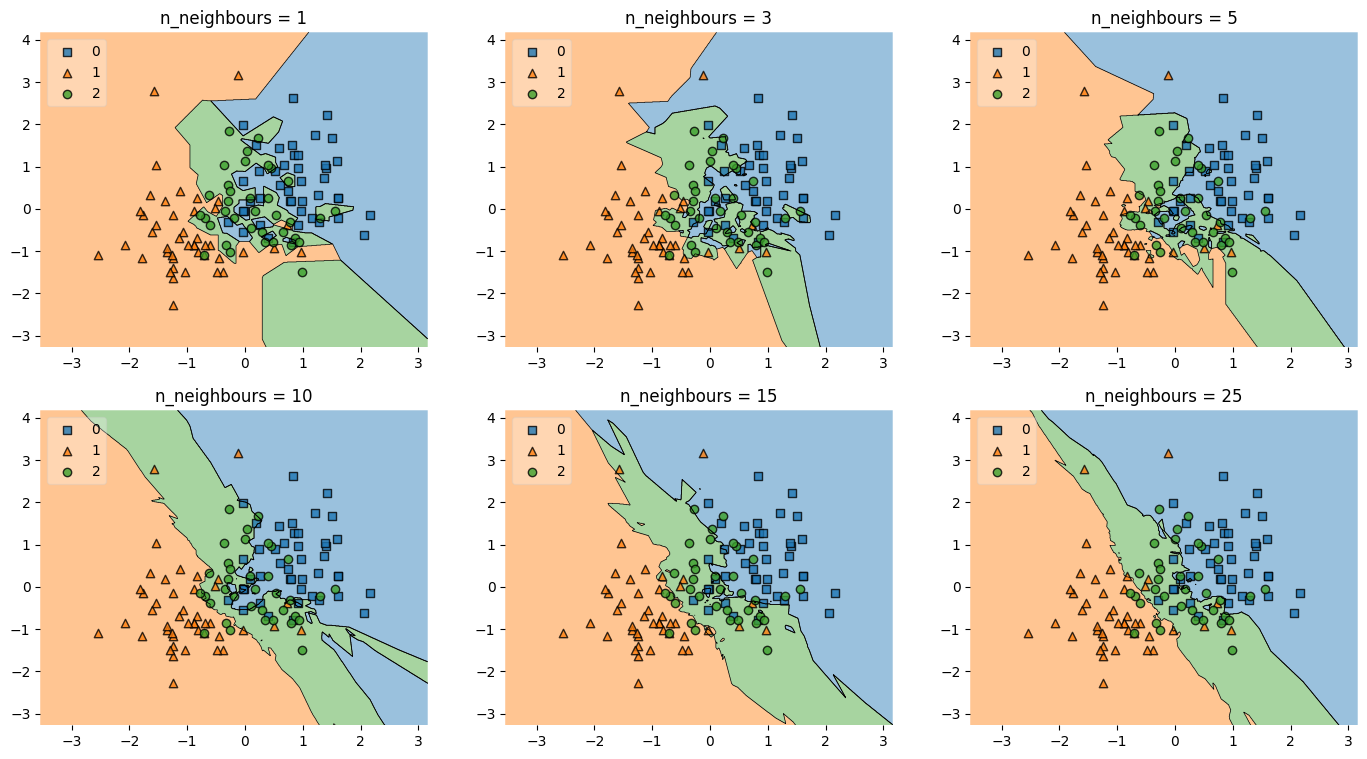

In [9]:
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
gs = gridspec.GridSpec(2, 3)
for i,grd in zip(range(6), itertools.product([0, 1, 2] , repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=result['Clf'][i], legend=2)
    plt.title(f"n_neighbours = {result['NN'][i]}")
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

**Вывод:**   
Из 1.3: Оптимальным числом соседей для данной выборки является k=1/3/25, ведь при данных значениях можно наблюдать хорошее качество распознавания данных тестовой выборки.  
Из 1.5: Можно увидеть, что при k=1/3 области каждого из классов не являются достаточно однородными, а также можно утверждать, что при данных значениях k модель переобучается, ведь распознавание тестовой выборки происходит сильно хуже, чем тренировочной (из 1.3). Так что наиболее оптимальным числом соседей является k=25.  
Ответ: k=25.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

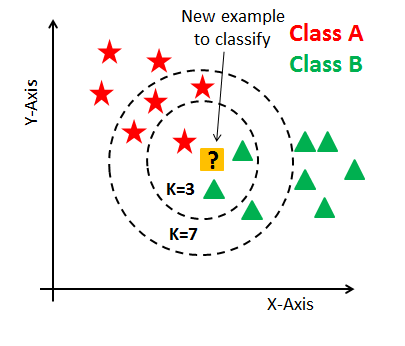

In [10]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
      self.X_train = X
      self.y_train = y
      
    def predict(self, X):
      def get_class(x):
        res = sorted(list(zip(self.X_train, self.y_train)), key=lambda pair: np.linalg.norm(x-pair[0]))
        counter = dict(Counter([value for _ , value in res][:self.k]))
        return max(counter, key=counter.get)
      return np.array([get_class(x) for x in X])

In [11]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [12]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [13]:
! wget https://github.com/VladVslv/HSE_ML_projects/raw/data/diamonds.csv

--2023-03-22 21:40:24--  https://github.com/VladVslv/HSE_ML_projects/raw/data/diamonds.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/VladVslv/HSE_ML_projects/data/diamonds.csv [following]
--2023-03-22 21:40:25--  https://raw.githubusercontent.com/VladVslv/HSE_ML_projects/data/diamonds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3192560 (3.0M) [text/plain]
Saving to: 'diamonds.csv.2'

     0K .......... .......... .......... .......... ..........  1% 1.46M 2s
    50K .......... .......... .......... .......... ..........  3% 1.57M 2s
   100K .......... .......... ...

In [14]:
data = pd.read_csv('diamonds.csv',sep=",")
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [15]:
data.isnull().values.any() # No missing values

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [16]:
data=data.drop(columns=["Unnamed: 0"])
data_columns = data.columns
for column in data_columns:
  if(data[column].nunique()==1):
    data=data.drop(columns=[column])
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [17]:
from statistics import correlation

In [18]:

correlation_m  = {}
numeric_columns = data.columns[data.dtypes!=object]
for column_1 in numeric_columns:
  correlation_m[column_1]={}
  for column_2 in numeric_columns:
    correlation_m[column_1][column_2]=correlation(np.array(data[column_1]),np.array(data[column_2]))
y = data['price']
X = data.drop(columns=['price'])
pd.DataFrame(correlation_m)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Вывод:**  
Больше всего с целевой переменной коллериуют такие признаки, как carat, x, y, z (положительная линейная связь)

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [19]:
data_columns = X.columns[X.dtypes==object]
for column in data_columns:
  one_hot = pd.get_dummies(X[column])
  X = X.drop(columns=[column])
  X = X.join(one_hot)

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
print(f"Train: {mean_squared_error(y_train, lr.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, lr.predict(X_test))}")

Train: 1268510.9631158495
Test: 1303169.641509793


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

**Вывод:**
Все изначальные (сущестовавшие до кодирования категориальных признаков) вещественные признаки имеют на порядок меньшие коэффиценты, чем те, которые были получены после one-hot кодирования.

In [24]:
dict(zip(X_train.columns, lr.coef_))

{'carat': 5270.077219904141,
 'depth': -73.11465613371206,
 'table': -66.47539248163378,
 'x': -956.6636128047737,
 'y': 77.47852415010132,
 'z': -239.85893229831177,
 'Fair': 397227801446665.4,
 'Good': 675370228630456.0,
 'Ideal': 1149182524576335.5,
 'Premium': 1020705983170858.4,
 'Very Good': 979561275794920.1,
 'D': 311060991787348.06,
 'E': 363668303105058.75,
 'F': 359573506149493.2,
 'G': 384018098478973.8,
 'H': 339408532007127.6,
 'I': 281943573953318.4,
 'J': 208528084570857.9,
 'I1': 495869350731118.06,
 'IF': 790001115780527.8,
 'SI1': 1880767248702993.0,
 'SI2': 1651675390081300.5,
 'VS1': 1567999391996979.8,
 'VS2': 1842878196558836.0,
 'VVS1': 1108696401914294.0,
 'VVS2': 1280181381546093.8}

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [25]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

**Вывод:**
Коэффиценты изначальных (существовавших до кодирование категориальных признаков) не поддверглись значительным измениям, однако коэффиценты признаков, полученных после one-hot кодирования, изменились на несколько порядков.

Исходя из этого можно сделать вывод, что в изначальной регресии присутствовала проблемам мультиколлинеарности достаточно в большом масштабе.

In [26]:
lr_lasso = Lasso(alpha=10)
lr_lasso.fit(X_train, y_train)
dict(zip(X_train.columns, lr_lasso.coef_))

{'carat': 4837.343077715851,
 'depth': -41.99650803781764,
 'table': -54.82592816119131,
 'x': -459.9874492029184,
 'y': -0.0,
 'z': -246.41157572677375,
 'Fair': -130.4035225814523,
 'Good': -39.66108323163802,
 'Ideal': 40.363651029879186,
 'Premium': 0.0,
 'Very Good': -0.0,
 'D': 137.10602052652925,
 'E': 85.09834227231872,
 'F': 59.117300713841665,
 'G': -0.0,
 'H': -173.65773575832668,
 'I': -278.66401817813613,
 'J': -394.9636339958085,
 'I1': -473.51544273751705,
 'IF': 183.1279733838933,
 'SI1': -259.5469563686221,
 'SI2': -579.5703467522646,
 'VS1': 99.04673206852642,
 'VS2': -0.0,
 'VVS1': 180.83984911512144,
 'VVS2': 189.85160491222427}

In [27]:
lr_ridge = Ridge(alpha=10)
lr_ridge.fit(X_train, y_train)
dict(zip(X_train.columns, lr_ridge.coef_))

{'carat': 5233.942733012859,
 'depth': -69.90076833129835,
 'table': -67.34733395700502,
 'x': -904.8444710201106,
 'y': 70.66874990048368,
 'z': -248.83444763337084,
 'Fair': -128.59464571363222,
 'Good': -38.144484985442915,
 'Ideal': 50.48566647503809,
 'Premium': 15.4851523877703,
 'Very Good': 3.082997120885164,
 'D': 203.07100234878658,
 'E': 158.55446584744382,
 'F': 132.17703389753768,
 'G': 59.92248856924473,
 'H': -127.21927124446063,
 'I': -247.0598637563167,
 'J': -376.59739532843867,
 'I1': -457.5421373521708,
 'IF': 236.27163038920654,
 'SI1': -150.97675091210746,
 'SI2': -492.885065860104,
 'VS1': 202.82764024555425,
 'VS2': 105.83678376118006,
 'VVS1': 250.80234614260917,
 'VVS2': 271.15138624956995}

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [28]:
plt.rcParams['figure.figsize'] = [14, 7]

**Вывод:**
Lasso регрессия агрессивнее уменьшает веса, чем Ridge регрессия.

Lasso часто используют для отбора признаков, ведь данный метод хорошо подходит при маленьких размерах выборках с большим количеством признаков, среди которых и надо выбрать важные (веса "неважных" признаков при использовании данного вида регуляризации будут нулевыми или очень близкими к нулю).

c:\Users\vladi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.428e+08, tolerance: 5.933e+07
  model = cd_fast.enet_coordinate_descent(


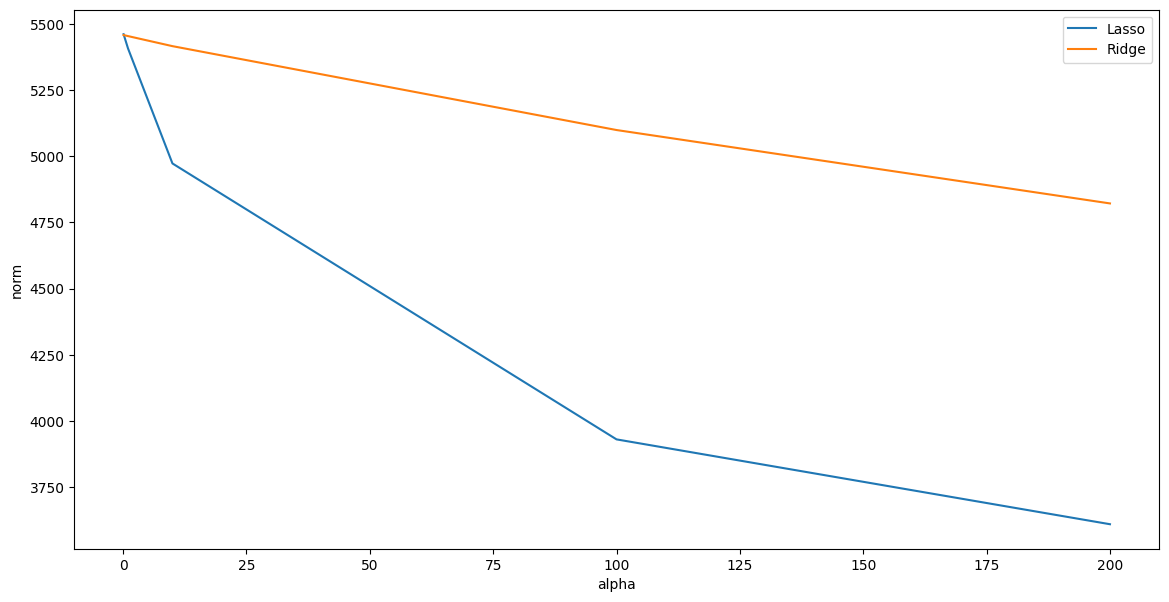

In [29]:
alphas = [0.1, 1, 10, 100, 200]
lasso_norm=[]
for alpha in alphas:
    lr_lasso = Lasso(alpha=alpha)
    lr_lasso.fit(X_train, y_train)
    lasso_norm.append(np.linalg.norm(lr_lasso.coef_))

ridge_norm=[]
for alpha in alphas:
    lr_ridge = Ridge(alpha=alpha)
    lr_ridge.fit(X_train, y_train)
    ridge_norm.append(np.linalg.norm(lr_ridge.coef_))

plt.plot(alphas, lasso_norm)
plt.plot(alphas, ridge_norm)
plt.xlabel('alpha')
plt.ylabel('norm')
plt.legend(['Lasso', 'Ridge'])

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [30]:
from sklearn.linear_model import LassoCV
from statistics import mean

In [31]:
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
alphas_error=dict(zip(lasso_cv.alphas_, [mean(row) for row in lasso_cv.mse_path_]))
best_alpha = min(alphas_error, key=alphas_error.get)
print(f"Alpha: {best_alpha}")

c:\Users\vladi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1014354645.2415199, tolerance: 47234925.03802861
  model = cd_fast.enet_coordinate_descent_gram(


Alpha: 1.0


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

**Вывод:**  
Неинформативные признаки - это те, которые имеют нулевые веса (y, Premium, ...).   
Наиболее информативными же являются признаки с большими (по сравнению с остальными признаками) весами (carat, x, z, ...).

Это может происходить из-за сильной линейной связи признака с другими признаками или слабой линейной связью признака и целевой переменной.

In [32]:
lr_lasso = Lasso(alpha = best_alpha)
lr_lasso.fit(X_train, y_train)
dict(zip(X_train.columns, lr_lasso.coef_))

{'carat': 5227.681273192086,
 'depth': -73.19442479807768,
 'table': -66.55060765238812,
 'x': -860.8912888873722,
 'y': 0.0,
 'z': -216.99872110900455,
 'Fair': -134.10001719664388,
 'Good': -46.52706475672785,
 'Ideal': 34.98496282891244,
 'Premium': 0.0,
 'Very Good': -8.933741140875668,
 'D': 153.14987080417316,
 'E': 100.55544152304245,
 'F': 74.8659820329659,
 'G': -0.0,
 'H': -179.72021708960713,
 'I': -290.35278692869764,
 'J': -408.39121113517086,
 'I1': -485.36171666171,
 'IF': 189.85195091188507,
 'SI1': -258.736802799916,
 'SI2': -587.2289770549212,
 'VS1': 111.63297567171864,
 'VS2': -0.0,
 'VVS1': 186.03799905014301,
 'VVS2': 196.59368663473353}

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

**Вывод:**  
Для предсказаний лучше использвать Lasso-регрессию, но стоит заметить, что стандартная регрессия в данной задаче показывает себя не сильно хуже (среднеквадратичиные ошибки не сильно друг от друга отличаются). Это можно объяснить тем, что в выборке нет признаков с сильной линейной зависимостью.

In [33]:
print(f"Standart regression: {mean_squared_error(y_test, lr.predict(X_test))}")
print(f"Lasso regression: {mean_squared_error(y_test, lr_lasso.predict(X_test))}")


Standart regression: 1303169.641509793
Lasso regression: 1302110.3266390304
